In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import BisectingKMeans
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("data_clustering.csv",index_col=0)

In [4]:
pca2 = PCA(n_components = 7)
pca2.fit(data)
scores_pca = pca2.transform(data)

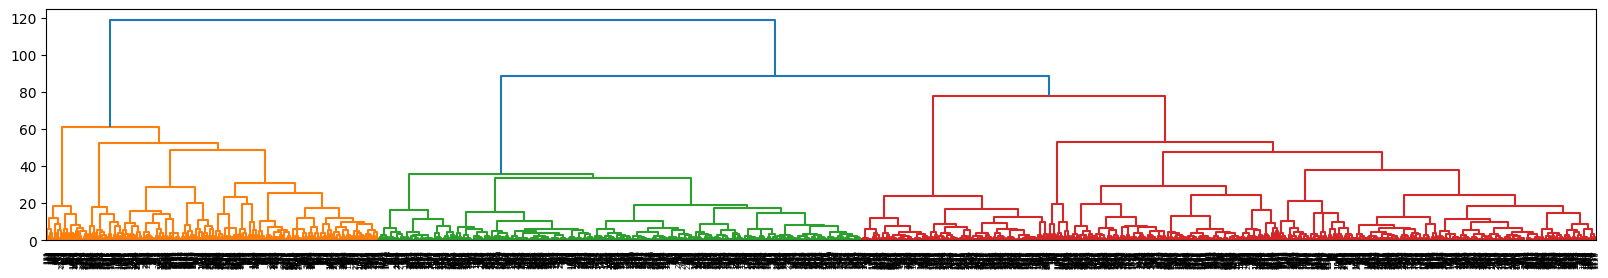

In [5]:
plt.figure(figsize=(20, 3))
linkage_data = linkage(scores_pca, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [6]:
wcss = []
for i in range(1,21):
    #hier_pca = AgglomerativeClustering(n_clusters = i, affinity='euclidean', linkage='ward')
    hier_pca = BisectingKMeans(n_clusters=i)
    hier_pca.fit(scores_pca)
    wcss.append(hier_pca.inertia_)

Text(0, 0.5, 'WCSS or Variance')

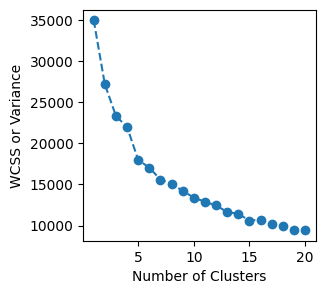

In [7]:
plt.figure(figsize = (3,3))
plt.plot(range(1,21),wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS or Variance")

In [8]:
#
ncluster = 7
hierarchical_cluster = AgglomerativeClustering(n_clusters=ncluster, affinity='euclidean', linkage='ward')
#hierarchical_cluster = BisectingKMeans(n_clusters=ncluster)#, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(scores_pca)

In [9]:
hier_result = data.copy()
hier_result["label"] = labels
hier_result = hier_result.reset_index()
hier_result[["cntry","year"]] = hier_result["Unnamed: 0"].str.split("-",expand=True)
hier_result["year"] = hier_result["year"].astype(int)
hier_result

,Unnamed: 0,Coal_Share_PhasedOut,Coal_Gen_Decline_Perc,Gas_Gen_Decline_Perc,num_supply_policy,WDI_Coal_El_.,WDI_NG_El_.,Share_VRE_Gen,Coal_duration_year,Gas_duration_year,...,Gas_logCurrent_MW,LogBP_GasR2P_yr,HHI_Coal_Import,HHI_Gas_Import,NetValue_Coal_Import,NetValue_Gas_Import,R_Choice,label,cntry,year
0,AGO-2017,-0.282271,-0.385317,-0.307092,1.603317,-0.807329,-0.272712,-0.396314,-1.087103,-1.330732,...,-0.131304,-0.595262,1.540009,0.812922,-0.004024,-0.168026,0.0,2,AGO,2017
1,AGO-2018,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.406118,-0.401152,-1.087103,-1.282594,...,-0.131304,-0.595262,0.744938,-0.846312,-0.002532,-0.219892,0.0,2,AGO,2018
2,AGO-2019,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.260609,-0.405162,-1.087103,-1.234456,...,-0.131304,-0.595262,1.524391,-0.148899,-0.007150,-0.178880,0.0,2,AGO,2019
3,AGO-2020,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.296971,-0.406599,-1.087103,-1.186317,...,-0.131304,-0.595262,1.370326,-0.250561,-0.008906,-0.153122,0.0,2,AGO,2020
4,AGO-2021,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.246891,-0.406418,-1.087103,-1.138179,...,-0.131304,-0.595262,1.381785,0.824350,-0.008661,-0.417218,0.0,2,AGO,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,ZWE-2017,-0.282271,-0.385317,-0.307092,-0.023948,0.777035,-1.003199,-0.404209,1.344506,-1.330732,...,-2.275119,-0.595262,0.052004,0.548059,-0.010275,-0.017865,0.0,3,ZWE,2017
2782,ZWE-2018,-0.282271,-0.385317,-0.307092,0.247263,0.740939,-1.003199,-0.391633,1.384368,-1.330732,...,-2.275119,-0.595262,1.185963,0.920323,-0.010203,-0.017878,0.0,3,ZWE,2018
2783,ZWE-2019,-0.282271,-0.385317,-0.307092,0.518474,0.886684,-1.003199,-0.369056,1.424231,-1.330732,...,-2.275119,-0.595262,-0.061621,-0.623138,-0.011100,-0.017870,0.0,3,ZWE,2019
2784,ZWE-2020,-0.282271,-0.385317,-0.307092,0.518474,0.902496,-1.003199,-0.364249,1.464093,-1.330732,...,-2.275119,-0.595262,0.295744,0.062081,-0.013145,-0.017885,0.0,3,ZWE,2020


<Axes: xlabel='Coal_Gen_Decline_Perc', ylabel='Gas_Gen_Decline_Perc'>

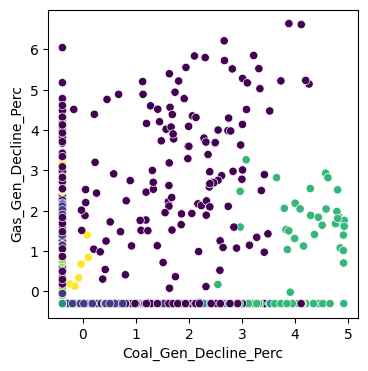

In [10]:
fig, axes = plt.subplots(figsize = (4,4))
sns.scatterplot(x=data["Coal_Gen_Decline_Perc"],y=data["Gas_Gen_Decline_Perc"],c=labels)

Text(0.5, 14.722222222222216, '')

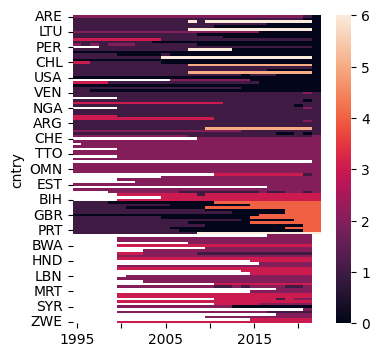

In [11]:
fig, axes = plt.subplots(figsize = (4,4))
pivot_heatmap = hier_result.pivot(index='cntry', columns='year', values='label')
pivot_heatmap = pivot_heatmap.sort_values(by=2022)
sns.heatmap(pivot_heatmap)
plt.xticks(np.arange(6)*5+0.5 ,rotation=0)
axes.set_xlabel("")

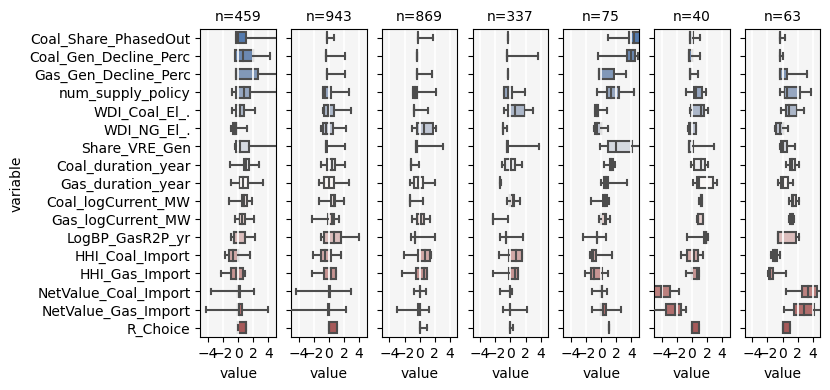

In [12]:
melted_cluster = pd.melt(hier_result, id_vars=["label"], value_vars=data.columns)#'Unnamed: 0'
fig, axes = plt.subplots(1,ncluster,figsize = (8,4))
for num in np.arange(ncluster):
    axes[num].set_facecolor('whitesmoke')
    axes[num].grid(which='major', color='white', linewidth=1.2,zorder=-10)
    axes[num].set_xticks([-4,-2,0,2,4])
    sns.boxplot(melted_cluster.query("label==@num").drop(columns="label"), x="value", y="variable", 
       width=.6, whis=(0, 100),palette="vlag",ax=axes[num],zorder=20)
    num_obs = len(hier_result.query("label==@num"))
    if num!=0:
        axes[num].set_yticklabels([])
        axes[num].set_ylabel("")
    axes[num].set_xlim([-5,5])
    axes[num].set_title("n="+str(num_obs),fontsize=10)

In [13]:
hier_result.query("label==0").query("year==2022")

,Unnamed: 0,Coal_Share_PhasedOut,Coal_Gen_Decline_Perc,Gas_Gen_Decline_Perc,num_supply_policy,WDI_Coal_El_.,WDI_NG_El_.,Share_VRE_Gen,Coal_duration_year,Gas_duration_year,...,Gas_logCurrent_MW,LogBP_GasR2P_yr,HHI_Coal_Import,HHI_Gas_Import,NetValue_Coal_Import,NetValue_Gas_Import,R_Choice,label,cntry,year
32,ARE-2022,7.126249,-0.385317,-0.307092,0.518474,-0.807329,-0.050725,0.267810,-1.007378,0.739215,...,1.190496,-0.595262,0.156617,0.958254,1.319540,-1.267726,0.0,0,ARE,2022
110,AUS-2022,1.286938,1.317885,-0.307092,1.332106,0.937428,0.035918,3.412993,1.464093,1.316875,...,0.864274,0.258426,-0.443326,-1.152292,-0.087290,-0.190355,1.0,0,AUS,2022
250,BGR-2022,1.124602,0.802293,0.408388,1.332106,0.823346,-0.819418,0.534913,1.743130,1.557566,...,0.035146,-0.592446,0.029813,-0.660118,-0.315117,0.420807,1.0,0,BGR,2022
374,BRA-2022,-0.054003,1.755225,-0.307092,2.145738,0.205170,0.204114,1.985725,1.185056,0.883630,...,0.847005,-0.034554,-0.163460,-0.716321,0.953356,0.793718,0.0,0,BRA,2022
480,CHL-2022,0.954148,1.746311,0.361292,2.959371,-0.019582,-0.293286,3.898525,1.224919,-0.127275,...,0.482557,-0.472284,0.216219,-0.962002,0.483955,0.947522,0.0,0,CHL,2022
595,CZE-2022,0.919086,1.279767,-0.307092,1.060895,0.867630,-0.753608,0.147203,1.743130,3.097992,...,0.140685,0.896420,-0.084177,-0.059353,0.155801,0.508849,1.0,0,CZE,2022
623,DEU-2022,1.396166,1.830931,-0.307092,4.586635,0.389812,-0.476427,4.474983,2.699829,2.809162,...,1.038722,0.136014,-1.022826,-1.141499,1.036282,1.170145,1.0,0,DEU,2022
834,FIN-2022,4.127004,4.118030,6.618907,0.789685,-0.648930,-0.950180,2.193853,1.464093,1.124322,...,0.215782,-0.595262,-0.356202,-0.810970,0.484135,0.104679,1.0,0,FIN,2022
1020,HRV-2022,-0.282271,-0.385317,-0.307092,3.501792,-0.386775,-0.181980,2.217006,1.025606,0.883630,...,-0.055352,-0.744748,0.394252,-0.436431,0.249462,1.052127,1.0,0,HRV,2022
1048,HUN-2022,1.950256,3.422669,2.894903,1.332106,-0.492510,-0.206402,1.779641,1.743130,0.017140,...,0.329890,-0.670895,-0.601366,-1.063228,0.484417,0.881618,1.0,0,HUN,2022
